In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt



In [4]:
#data

directory = "C:/Users/geeze/Box/biocircuits/Reed/projects/lab misc/echo_cfu_count/"
file = "20200123 384 echo cfu test.xlsx"

d = pd.read_excel(directory + file, sheet_name=None)

In [7]:
d["cfu_counts"]

,cell,time,dil,OD700_off,OD700_BULK_off,OD700_BULK_plate3adjust_off,OD700_cfumL,OD700_BULK_cfumL,OD700_BULK_plate3adjust_cfumL,CFP_BULK_off,YFP_BULK_off,RFP_BULK_off,CFP_BULK_cfumL,YFP_BULK_cfumL,RFP_BULK_cfumL
0,2c1r,0,10,0.041667,0.041667,0.041667,3.178054e+05,3.178054e+05,3.178054e+05,0.062500,1.000000,0.979167,2.772589e+05,0.000000e+00,2.105341e+03
1,2c1r,0,100,0.604167,0.604167,0.604167,5.039052e+05,5.039052e+05,5.039052e+05,0.625000,1.000000,0.958333,4.700036e+05,0.000000e+00,4.255961e+04
2,2c1r,0,1000,0.916667,0.916667,0.916667,8.701138e+05,8.701138e+05,8.701138e+05,0.916667,1.000000,1.000000,8.701138e+05,0.000000e+00,0.000000e+00
3,2c1r,0,10000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,1c2r,0,10,0.020833,0.020833,0.020833,3.871201e+05,3.871201e+05,3.871201e+05,0.041667,1.000000,0.958333,3.178054e+05,0.000000e+00,4.255961e+03
5,1c2r,0,100,0.729167,0.729167,0.729167,3.158529e+05,3.158529e+05,3.158529e+05,0.750000,1.000000,0.979167,2.876821e+05,0.000000e+00,2.105341e+04
6,1c2r,0,1000,0.958333,0.958333,0.958333,4.255961e+05,4.255961e+05,4.255961e+05,0.958333,1.000000,1.000000,4.255961e+05,0.000000e+00,0.000000e+00
7,1c2r,0,10000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
8,2c1y,0,10,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.020833,0.020833,1.000000,3.871201e+05,3.871201e+05,0.000000e+00
9,2c1y,0,100,0.270833,0.270833,0.270833,1.306252e+06,1.306252e+06,1.306252e+06,0.479167,0.604167,1.000000,7.357068e+05,5.039052e+05,0.000000e+00


In [239]:
#this only applies to the echo counted ones for now, so get rid of everything without a probability of empty well
df = df.dropna(subset=['OD700_empty_frac'])

In [240]:
#define the function that we are using to tranform the data from probabilities to counts
def prob_empty (dil, lam):
    
    return np.exp((-lam) / dil)

In [241]:
data = []

for w in df['well'].unique():
    d = df[df['well'] == w]
    
    #the calculated probability of empty well
    probs = d["OD700_empty_frac"].values
    
    #the actual dilutions from the sample
    dils = (d["dil"] * d["sample dil"]).values
    
    #fit your function with your data. You should compare bayesian methods and other optimization methods
    #you learned in bi 103, see your old hws
    pars, cov = curve_fit(f=prob_empty, xdata=dils, ydata=probs, p0=[0.5], bounds=(0, np.inf)) #must be positive number
    #pars is in units of (cells / 100nL)
    
    lam = (pars * 10**6) / 100 # 10^6 is the multiplication up to mL from nL, 100 is the total volume shot that needs dividing
    
    data.append((w, lam, cov))

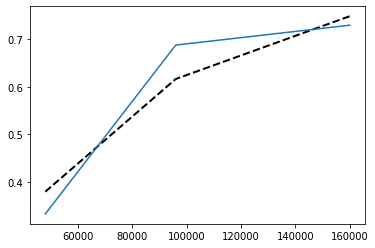

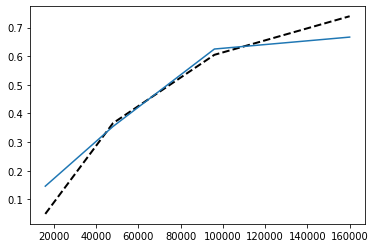

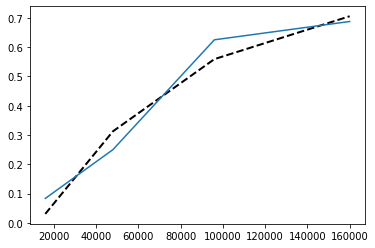

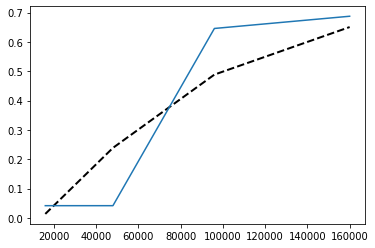

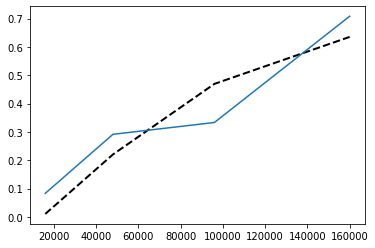

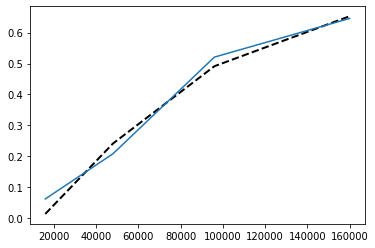

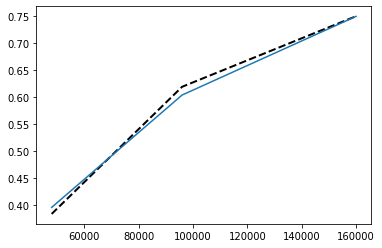

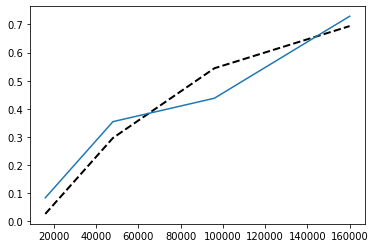

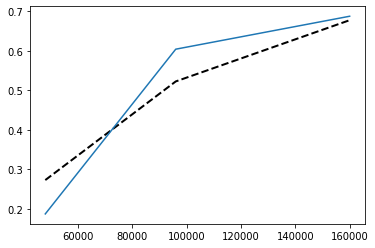

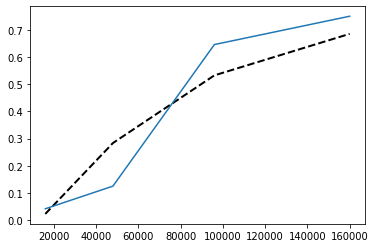

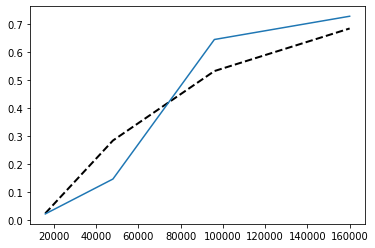

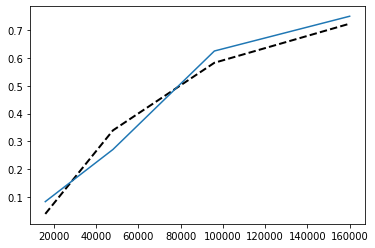

In [247]:
for d in data:
    fig,ax = plt.subplots()
    
    dils = df.loc[df['well'] == d[0], 'dil'] * df.loc[df['well'] == d[0], 'sample dil']
    probs = df.loc[df['well'] == d[0], 'OD700_empty_frac']
    
    #plot the esimated curve
    plt.plot(dils, prob_empty(dils, d[1]/10**4), linestyle='--', linewidth=2, color='black')
    
    #plot the data
    plt.plot(dils, probs)